In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eda_df = pd.read_csv('eda2.csv', index_col=0)

In [3]:
eda_df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Education_Level,Years_Customer,Days_Customer
0,58138,58,635,88,546,172,88,88,3,8,...,1,57,1617,25,1,0,0,Graduate,2,971
1,46344,38,11,1,6,2,1,6,2,1,...,0,60,27,6,0,0,2,Graduate,0,125
2,71613,26,426,49,127,111,21,42,1,8,...,0,49,776,21,0,1,0,Graduate,1,472
3,26646,26,11,4,20,10,3,5,2,2,...,0,30,53,8,0,1,1,Graduate,0,65
4,58293,94,173,43,118,46,27,15,5,5,...,0,33,422,19,0,1,1,Postgraduate,0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223,46,709,43,182,42,118,247,2,9,...,0,47,1341,18,0,1,1,Graduate,1,541
2201,64014,56,406,0,30,0,0,8,7,8,...,0,68,444,22,1,1,3,Postgraduate,0,61
2202,56981,91,908,48,217,32,12,24,1,2,...,0,33,1241,19,1,0,0,Graduate,0,315
2203,69245,8,428,30,214,80,30,61,2,6,...,0,58,843,23,0,1,1,Postgraduate,0,316


In [9]:
# Education_Level 더미변수 변환

eda_df = pd.get_dummies(eda_df, columns = ['Education_Level'])

In [10]:
eda_df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'TotalMntSpent', 'TotalNumPurchases',
       'Total_Acc_Cmp', 'Partner', 'Children', 'Years_Customer',
       'Days_Customer', 'Education_Level_Graduate',
       'Education_Level_Postgraduate', 'Education_Level_Undergraduate'],
      dtype='object')

## 1. K-means

최적의 k값을 설정하는 방법
1. Elbow method
2. Silhouette method

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

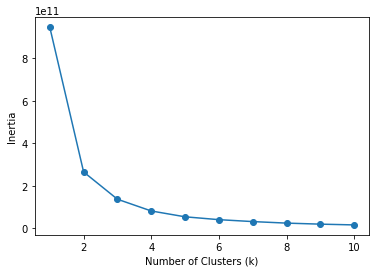

In [12]:
num_clusters = list(range(1, 11))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(eda_df)
    inertias.append(model.inertia_)
    
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### 1-1. Elbow method (KElbowVisualizer)

In [13]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

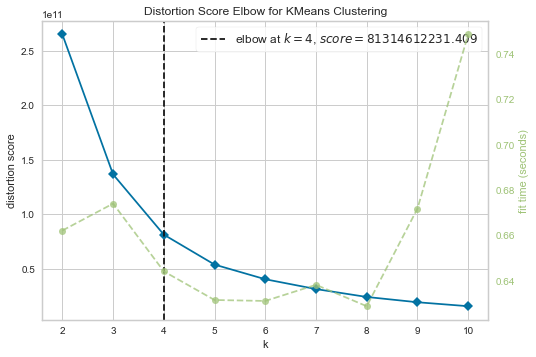

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(eda_df)
elbow_method.show()

### 1-2. Silhouette method

- 실루엣 값은 개체가 다른 클러스터(seperation)에 비해 자신의 클러스터(cohesion)와 얼마나 유사한지 측정함.
- 실루엣 범위는 -1에서 +1까지이며, 값이 높으면 객체가 자체 클러스터와 잘 일치하고 인접 클러스터와 잘 일치하지 않음.
- 대부분의 개체에 높은 값이 있으면 클러스터링 구성이 적합함.
- 많은 포인트의 값이 낮거나 음수이면 클러스터링 구성에 클러스터가 너무 많거나 적을 수 있음.

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

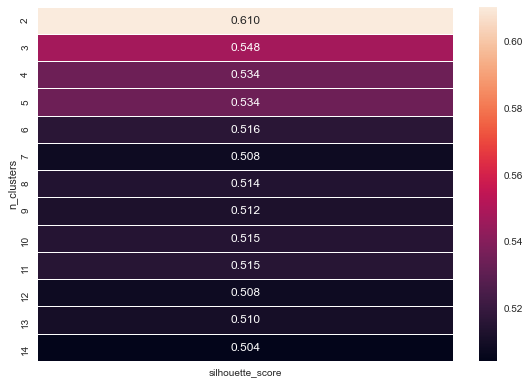

In [17]:
visualize_silhouette_layer(eda_df)

-> 가장 높은 실루엣값이 있는 0.610에 매핑되는 클러스터 K=2이 적정하다는 것을 보여줌

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer

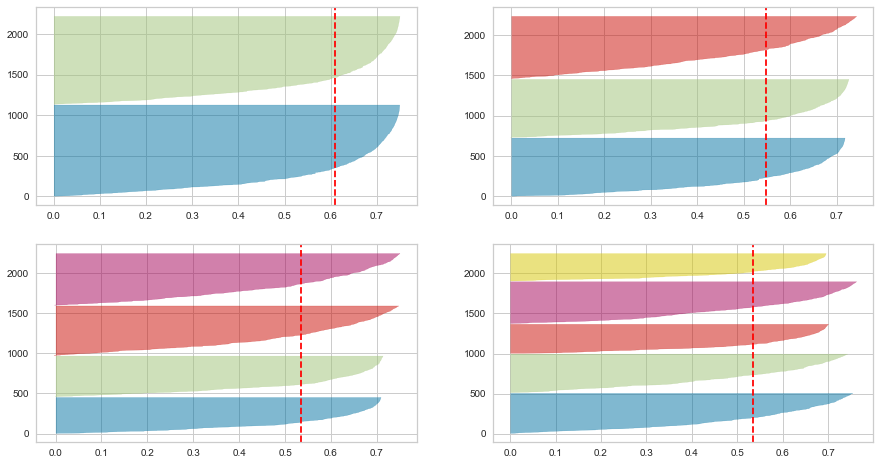

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(eda_df)

-> k=2일 때 전체 데이터의 실루엣 계수 평균이 가장 높음

======================================================================================================================

## 2. K-means clustering (k=4)

In [20]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(eda_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
eda_df['cluster'] = model.fit_predict(eda_df)

In [21]:
model.cluster_centers_

array([[ 6.04554454e+04,  4.89249592e+01,  4.40869494e+02,
         3.09934747e+01,  1.69164763e+02,  4.13246330e+01,
         2.87781403e+01,  5.81941272e+01,  2.96900489e+00,
         5.62805873e+00,  3.35562806e+00,  7.65742251e+00,
         4.98042414e+00,  4.89396411e-02,  1.09298532e-01,
         1.95758564e-02,  2.93637847e-02,  1.63132137e-02,
         8.15660685e-03,  1.01141925e-01,  4.83866232e+01,
         7.69324633e+02,  1.96101142e+01,  3.24632953e-01,
         6.72104405e-01,  1.01957586e+00,  1.02610114e+00,
         5.25765090e+02,  4.77977162e-01,  4.46982055e-01,
         7.50407830e-02],
       [ 2.30768899e+04,  4.90337079e+01,  1.66539326e+01,
         5.51460674e+00,  2.08943820e+01,  8.06067416e+00,
         5.77528090e+00,  1.62921348e+01,  2.04044944e+00,
         1.94382022e+00,  4.56179775e-01,  2.88314607e+00,
         7.09213483e+00,  7.41573034e-02,  2.24719101e-03,
        -2.77555756e-17,  0.00000000e+00, -8.67361738e-18,
         1.12359551e-02,  1.01

In [22]:
eda_df['cluster'].value_counts()

3    641
0    613
2    505
1    446
Name: cluster, dtype: int64

### 2-1. cluster별로 확인

In [30]:
eda_df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'TotalMntSpent', 'TotalNumPurchases',
       'Total_Acc_Cmp', 'Partner', 'Children', 'Years_Customer',
       'Days_Customer', 'Education_Level_Graduate',
       'Education_Level_Postgraduate', 'Education_Level_Undergraduate',
       'cluster'],
      dtype='object')

#### 1. Income

<AxesSubplot:xlabel='Income', ylabel='cluster'>

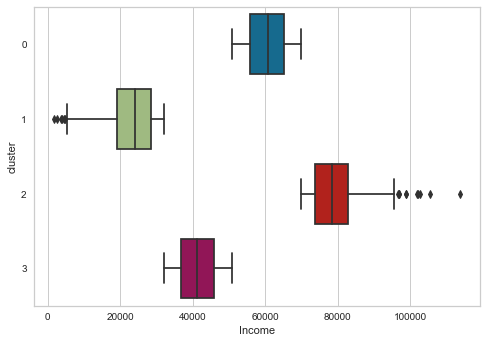

In [29]:
sns.boxplot(data=eda_df, x='Income', y='cluster', orient='h')  # 가구 소득

- cluster1 < cluster3 < cluster0 < cluster2 순서로 소득이 높음
- cluster1 : 저소득층
- cluster2 : 고소득층

#### 2. MntSpent

<AxesSubplot:xlabel='MntGoldProds', ylabel='cluster'>

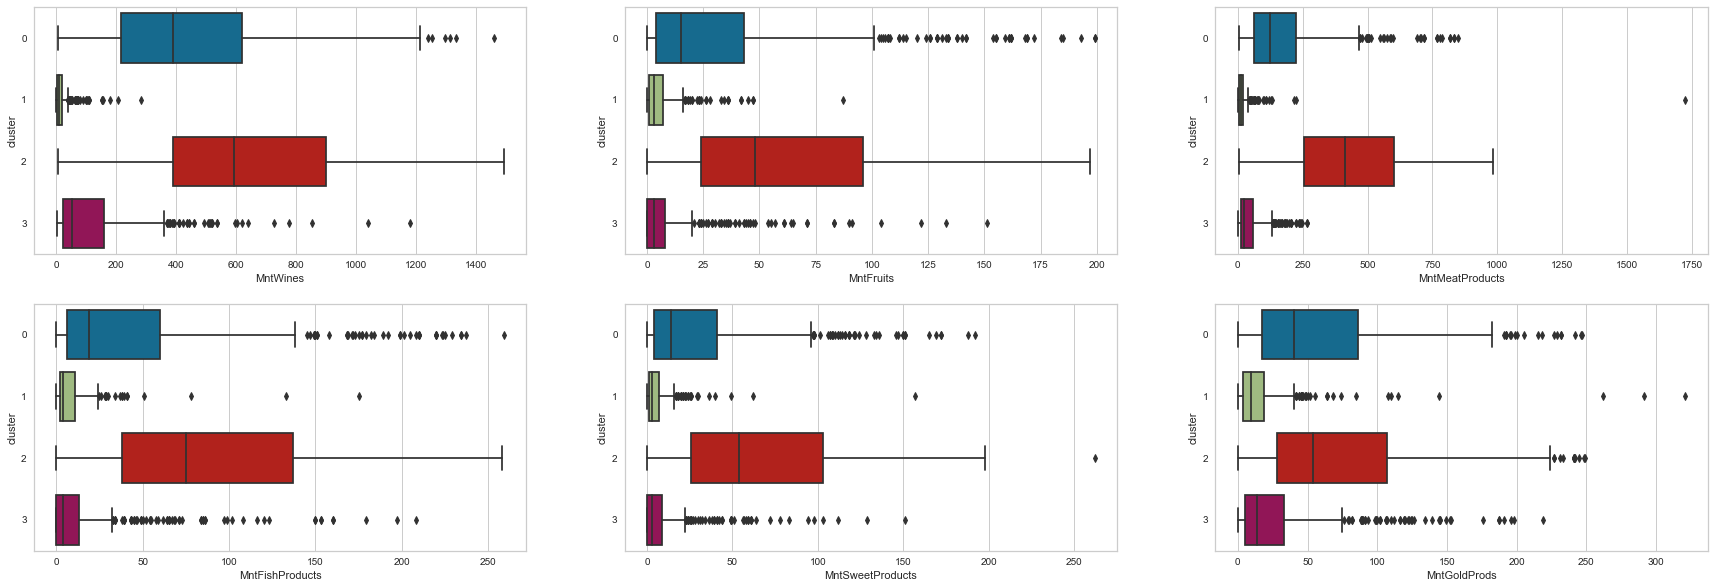

In [31]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30, 10)

sns.boxplot(data=eda_df, x='MntWines', y='cluster', orient='h' ,ax=ax1)  # 지난 2년 와인 지출 비용
sns.boxplot(data=eda_df, x='MntFruits', y='cluster', orient='h' ,ax=ax2)  # 지난 2년 과일 지출 비용
sns.boxplot(data=eda_df, x='MntMeatProducts', y='cluster', orient='h' ,ax=ax3)  # 지난 2년 육류 지출 비용
sns.boxplot(data=eda_df, x='MntFishProducts', y='cluster', orient='h' ,ax=ax4)  # 지난 2년 생선류 지출 비용
sns.boxplot(data=eda_df, x='MntSweetProducts', y='cluster', orient='h' ,ax=ax5)  # 지난 2년 간식 지출 비용
sns.boxplot(data=eda_df, x='MntGoldProds', y='cluster', orient='h' ,ax=ax6)  # 지난 2년간 금 지출 비용

<AxesSubplot:xlabel='TotalMntSpent', ylabel='cluster'>

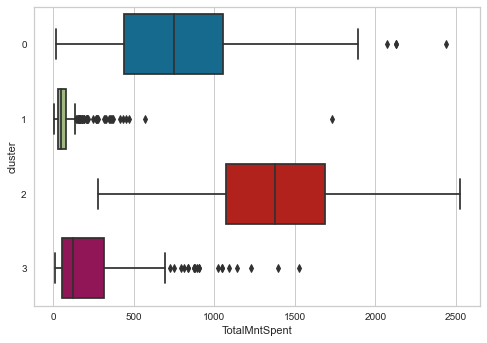

In [32]:
sns.boxplot(data=eda_df, x='TotalMntSpent', y='cluster', orient='h')

- 총지출은 수입에 비례하는 경향이 있음 (cluster1 < cluster3 < cluster0 < cluster2)

#### 3. NumPurchases

<AxesSubplot:xlabel='TotalNumPurchases', ylabel='cluster'>

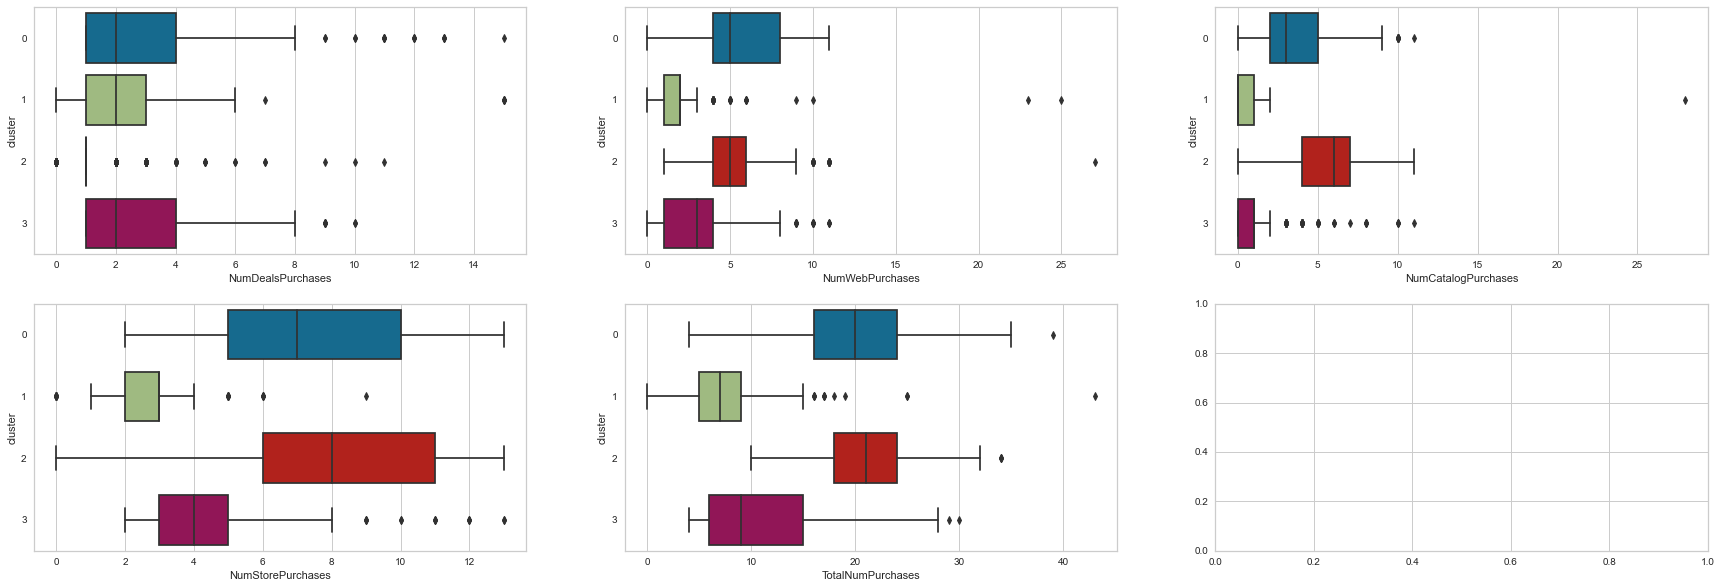

In [33]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30, 10)

sns.boxplot(data=eda_df, x='NumDealsPurchases', y='cluster', orient='h' ,ax=ax1)  # 할인일 때 구매한 횟수
sns.boxplot(data=eda_df, x='NumWebPurchases', y='cluster', orient='h' ,ax=ax2)  # 웹사이트를 통해 구매한 횟수
sns.boxplot(data=eda_df, x='NumCatalogPurchases', y='cluster', orient='h' ,ax=ax3)  # 카탈로그를 통해 구매한 횟수
sns.boxplot(data=eda_df, x='NumStorePurchases', y='cluster', orient='h' ,ax=ax4)  # 가게에서 구매한 횟수
sns.boxplot(data=eda_df, x='TotalNumPurchases', y='cluster', orient='h' ,ax=ax5)

- 수입이 적은 그룹보다 수입이 많은 그룹에서 총 구매 횟수도 더 많음 (cluster1, cluster3 < cluster0, cluster2)

#### 4. Accepted

<AxesSubplot:xlabel='Response', ylabel='cluster'>

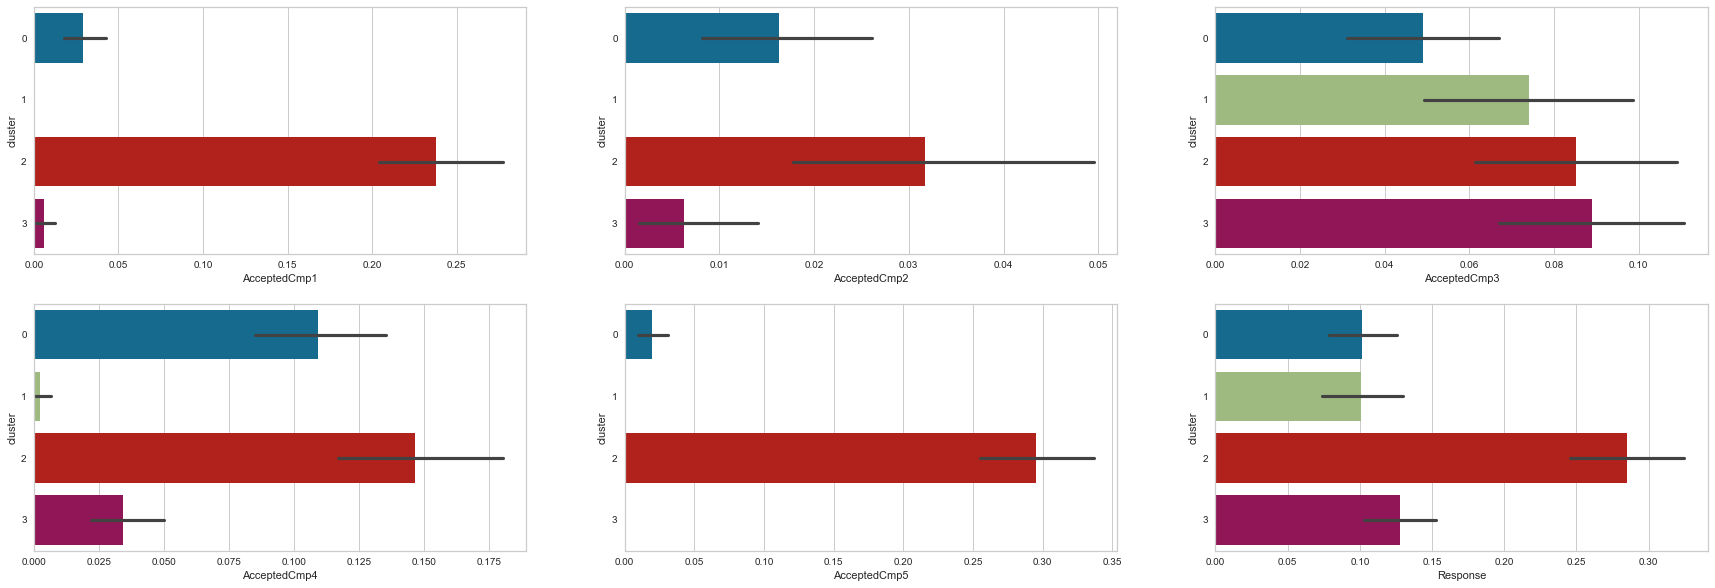

In [36]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30, 10)

sns.barplot(data=eda_df, x='AcceptedCmp1', y='cluster', orient='h' ,ax=ax1)  # 첫 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
sns.barplot(data=eda_df, x='AcceptedCmp2', y='cluster', orient='h' ,ax=ax2)  # 두 번재 캠페인에서 제안 수락한 경우 1, 그 외 0
sns.barplot(data=eda_df, x='AcceptedCmp3', y='cluster', orient='h' ,ax=ax3)  # 세 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
sns.barplot(data=eda_df, x='AcceptedCmp4', y='cluster', orient='h' ,ax=ax4)  # 네 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
sns.barplot(data=eda_df, x='AcceptedCmp5', y='cluster', orient='h' ,ax=ax5)  # 다섯 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
sns.barplot(data=eda_df, x='Response', y='cluster', orient='h' ,ax=ax6)  # 마지막 캠페인에서 제안 수락한 경우 1, 그 외 0

- 수입이 많은 그룹(cluster0, cluster2)에서 캠페인 수락 확률이 더 높음

#### 5. Education
- Graduate (Graduation)
- Postgraduate (Master, PhD)
- Undergraduate (Basic, 2n Cycle)

<AxesSubplot:xlabel='Education_Level_Undergraduate', ylabel='cluster'>

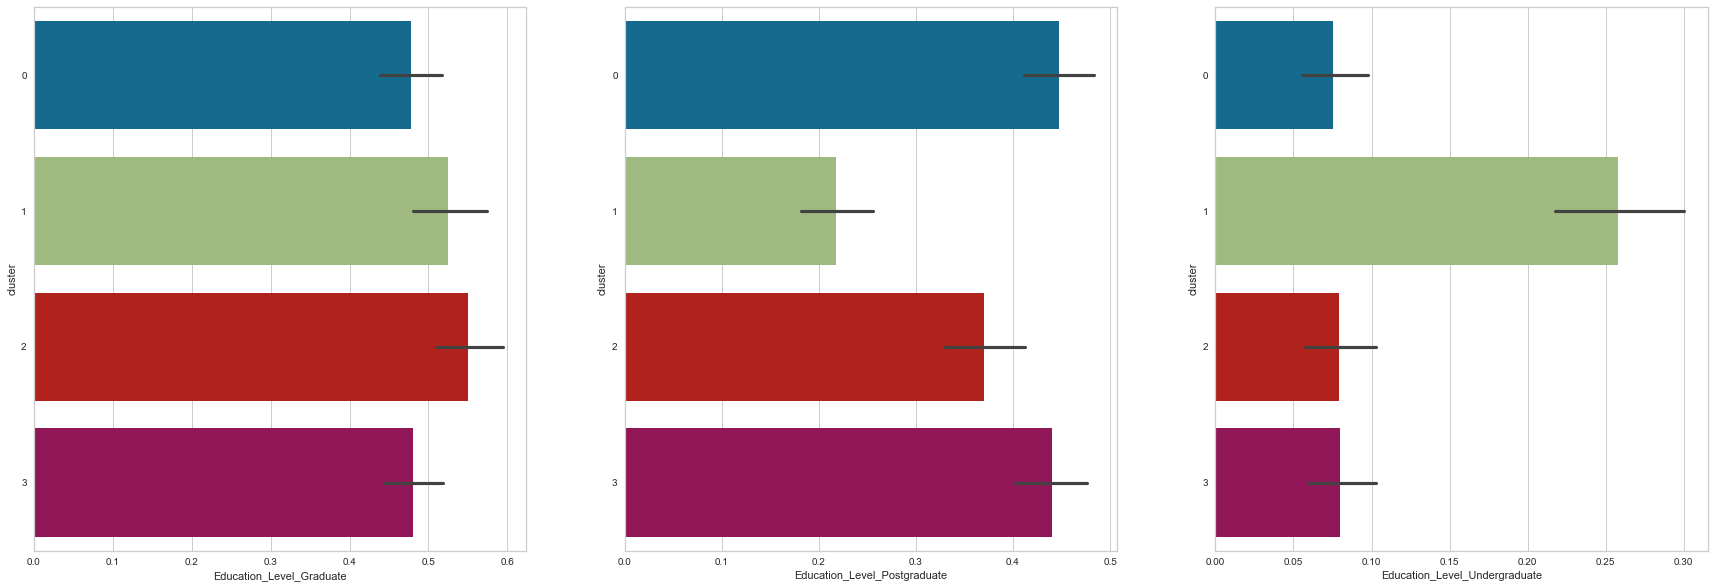

In [47]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(30, 10)

sns.barplot(data=eda_df, x='Education_Level_Graduate', y='cluster', orient='h' ,ax=ax1)  # Graduate (Graduation)
sns.barplot(data=eda_df, x='Education_Level_Postgraduate', y='cluster', orient='h' ,ax=ax2)  # Postgraduate (Master, PhD)
sns.barplot(data=eda_df, x='Education_Level_Undergraduate', y='cluster', orient='h' ,ax=ax3)  # Undergraduate (Basic, 2n Cycle)

- cluster1에서 Undergraduate의 비율이 높음

#### 6. Age, Partner, Children

<AxesSubplot:xlabel='Children', ylabel='count'>

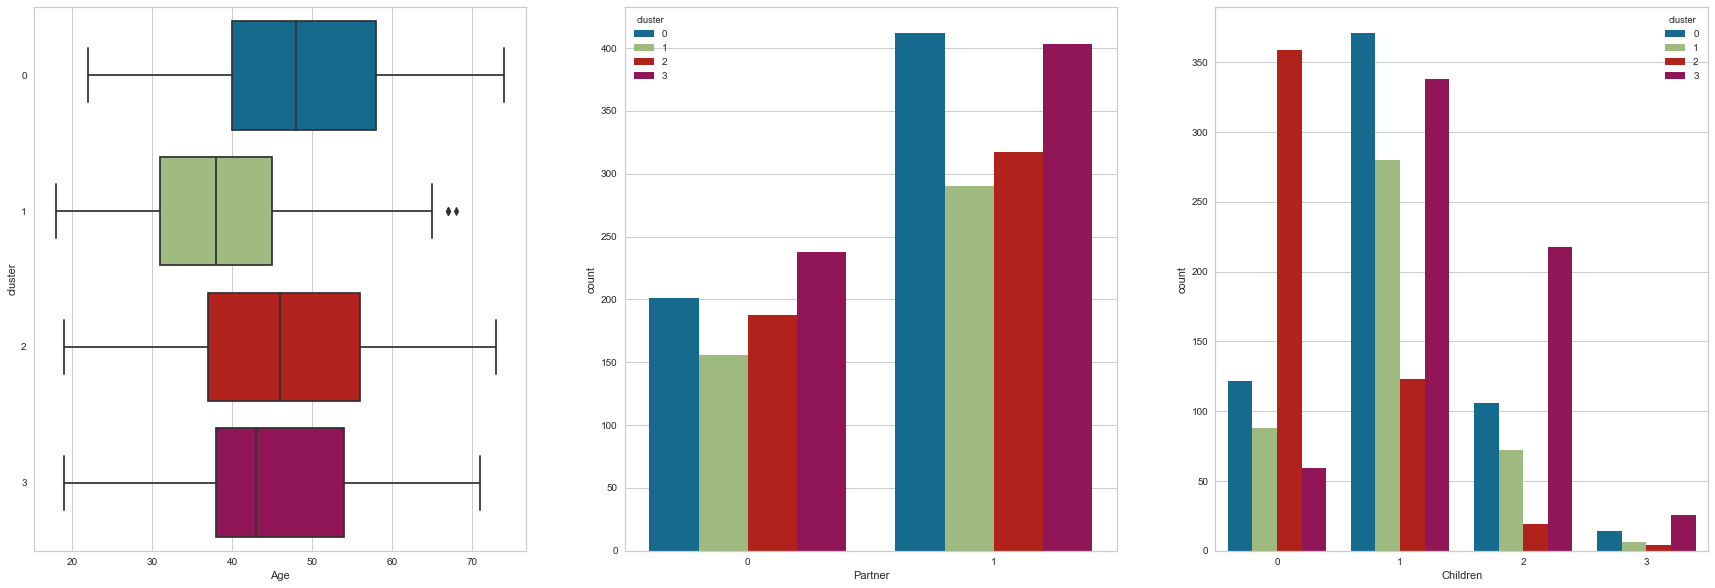

In [54]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(30, 10)

sns.boxplot(data=eda_df, x='Age', y='cluster', orient='h' ,ax=ax1)  # 고객의 나이
sns.countplot(data=eda_df, x='Partner', hue='cluster', orient='h' ,ax=ax2)  # 파트너의 유무
sns.countplot(data=eda_df, x='Children', hue='cluster', orient='h' ,ax=ax3)  # 자녀 수

- 고객의 나이와 파트너의 유무는 클러스터 분류에 큰 영향을 미치지 않음
- cluster2, cluster0은 대부분 자녀가 없거나 1명임
- cluster1, cluster3은 대부분 자녀가 1명 이상임

### 2-2. 변수 간 관계

In [59]:
cluster1 = eda_df[eda_df['cluster']==0]
cluster2 = eda_df[eda_df['cluster']==1]
cluster3 = eda_df[eda_df['cluster']==2]
cluster4 = eda_df[eda_df['cluster']==3]

In [60]:
cluster1.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Years_Customer,Days_Customer,Education_Level_Graduate,Education_Level_Postgraduate,Education_Level_Undergraduate,cluster
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.0
mean,60455.445351,48.924959,440.869494,30.993475,169.164763,41.324633,28.778140,58.194127,2.969005,5.628059,...,19.610114,0.324633,0.672104,1.019576,1.026101,525.765090,0.477977,0.446982,0.075041,0.0
std,5428.303443,28.142046,290.329815,40.185680,156.448024,52.706060,36.170751,53.539764,2.239139,2.638081,...,6.360599,0.672035,0.469830,0.680932,0.687876,236.764838,0.499923,0.497587,0.263672,0.0
min,50870.000000,0.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,55686.000000,25.000000,215.000000,4.000000,61.000000,6.000000,4.000000,17.000000,1.000000,4.000000,...,16.000000,0.000000,0.000000,1.000000,1.000000,358.000000,0.000000,0.000000,0.000000,0.0
50%,60631.000000,50.000000,389.000000,15.000000,124.000000,19.000000,14.000000,40.000000,2.000000,5.000000,...,20.000000,0.000000,1.000000,1.000000,1.000000,526.000000,0.000000,0.000000,0.000000,0.0
75%,65196.000000,73.000000,620.000000,43.000000,224.000000,60.000000,41.000000,86.000000,4.000000,8.000000,...,24.000000,0.000000,1.000000,1.000000,1.000000,702.000000,1.000000,1.000000,0.000000,0.0
max,69805.000000,99.000000,1459.000000,199.000000,849.000000,259.000000,192.000000,247.000000,15.000000,11.000000,...,39.000000,5.000000,1.000000,3.000000,2.000000,1061.000000,1.000000,1.000000,1.000000,0.0


In [61]:
cluster2.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Years_Customer,Days_Customer,Education_Level_Graduate,Education_Level_Postgraduate,Education_Level_Undergraduate,cluster
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,...,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.0
mean,23097.224215,48.959641,16.674888,5.508969,20.899103,8.051570,5.778027,16.262332,2.040359,1.943946,...,7.325112,0.177130,0.650224,0.991031,1.008969,524.802691,0.524664,0.217489,0.257848,1.0
std,6738.097812,29.011244,27.521508,8.356047,84.000060,13.118288,10.042049,28.091276,1.657990,1.904223,...,3.487976,0.466897,0.477435,0.642964,0.699862,231.782534,0.499952,0.413001,0.437941,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,19017.750000,24.000000,4.000000,1.000000,6.000000,2.000000,1.000000,4.000000,1.000000,1.000000,...,5.000000,0.000000,0.000000,1.000000,1.000000,347.250000,0.000000,0.000000,0.000000,1.0
50%,24184.500000,49.000000,8.000000,3.000000,11.000000,4.000000,3.000000,9.500000,2.000000,2.000000,...,7.000000,0.000000,1.000000,1.000000,1.000000,524.000000,1.000000,0.000000,0.000000,1.0
75%,28436.750000,75.750000,18.000000,7.000000,19.000000,11.000000,7.000000,19.000000,3.000000,2.000000,...,9.000000,0.000000,1.000000,1.000000,1.000000,702.500000,1.000000,0.000000,1.000000,1.0
max,32146.000000,99.000000,284.000000,87.000000,1725.000000,175.000000,157.000000,321.000000,15.000000,25.000000,...,43.000000,2.000000,1.000000,3.000000,2.000000,1063.000000,1.000000,1.000000,1.000000,1.0


In [62]:
cluster3.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Years_Customer,Days_Customer,Education_Level_Graduate,Education_Level_Postgraduate,Education_Level_Undergraduate,cluster
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.000000,505.000000,505.000000,505.000000,505.000000,505.00000,505.000000,505.000000,505.000000,505.0
mean,79243.243564,49.746535,647.635644,62.796040,441.481188,91.021782,68.221782,74.500990,1.356436,5.324752,...,20.867327,1.081188,0.627723,0.342574,0.922772,495.80198,0.550495,0.370297,0.079208,2.0
std,6953.608252,29.335483,329.012951,49.079948,234.630705,65.797862,53.283145,61.720444,1.149397,2.343829,...,4.238456,1.339029,0.483891,0.590491,0.684274,231.07086,0.497937,0.483363,0.270331,0.0
min,69867.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,2.0
25%,73691.000000,25.000000,390.000000,24.000000,254.000000,38.000000,26.000000,28.000000,1.000000,4.000000,...,18.000000,0.000000,0.000000,0.000000,0.000000,316.00000,0.000000,0.000000,0.000000,2.0
50%,78416.000000,52.000000,594.000000,48.000000,414.000000,75.000000,54.000000,54.000000,1.000000,5.000000,...,21.000000,1.000000,1.000000,0.000000,1.000000,490.00000,1.000000,0.000000,0.000000,2.0
75%,82800.000000,74.000000,899.000000,96.000000,601.000000,137.000000,103.000000,107.000000,1.000000,6.000000,...,24.000000,2.000000,1.000000,1.000000,1.000000,663.00000,1.000000,1.000000,0.000000,2.0
max,113734.000000,99.000000,1493.000000,197.000000,984.000000,258.000000,262.000000,249.000000,11.000000,27.000000,...,34.000000,5.000000,1.000000,3.000000,2.000000,1063.00000,1.000000,1.000000,1.000000,2.0


In [63]:
cluster4.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,TotalNumPurchases,Total_Acc_Cmp,Partner,Children,Years_Customer,Days_Customer,Education_Level_Graduate,Education_Level_Postgraduate,Education_Level_Undergraduate,cluster
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,...,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.0
mean,41261.046802,48.542902,109.745710,7.879875,44.533541,13.048362,8.031201,25.892356,2.647426,3.176287,...,10.923557,0.263651,0.628705,1.329173,0.934477,502.904836,0.480499,0.439938,0.079563,3.0
std,5326.707200,29.355714,139.446067,15.745027,48.309444,26.235993,15.838313,33.710152,1.790739,2.188421,...,5.766180,0.584224,0.483528,0.697702,0.672272,229.368165,0.500010,0.496767,0.270827,0.0
min,32173.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,36778.000000,24.000000,22.000000,0.000000,11.000000,0.000000,0.000000,5.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,322.000000,0.000000,0.000000,0.000000,3.0
50%,41039.000000,49.000000,53.000000,3.000000,25.000000,4.000000,3.000000,14.000000,2.000000,3.000000,...,9.000000,0.000000,1.000000,1.000000,1.000000,506.000000,0.000000,0.000000,0.000000,3.0
75%,45989.000000,73.000000,158.000000,8.000000,60.000000,13.000000,9.000000,33.000000,4.000000,4.000000,...,15.000000,0.000000,1.000000,2.000000,1.000000,674.000000,1.000000,1.000000,0.000000,3.0
max,50785.000000,99.000000,1181.000000,151.000000,267.000000,208.000000,151.000000,219.000000,10.000000,11.000000,...,30.000000,4.000000,1.000000,3.000000,2.000000,1032.000000,1.000000,1.000000,1.000000,3.0


#### 1. Income ~ TotalMntSpent

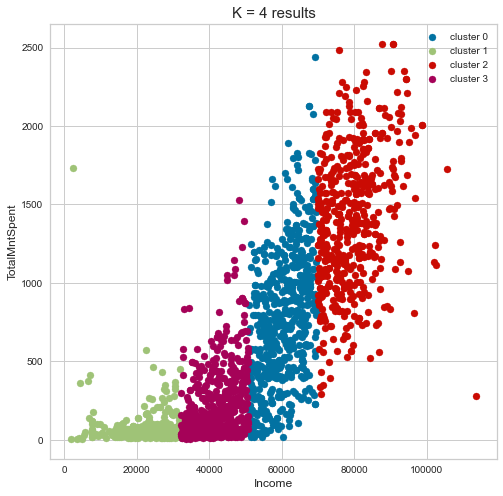

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(0,4):
    plt.scatter(eda_df.loc[eda_df['cluster'] == i, 'Income'], eda_df.loc[eda_df['cluster'] == i, 'TotalMntSpent'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Income', size = 12)
plt.ylabel('TotalMntSpent', size = 12)
plt.show()

#### 2. Income ~ TotalNumPurchases

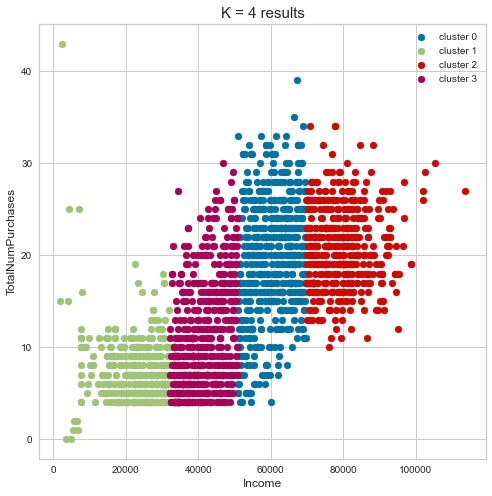

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(0,4):
    plt.scatter(eda_df.loc[eda_df['cluster'] == i, 'Income'], eda_df.loc[eda_df['cluster'] == i, 'TotalNumPurchases'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Income', size = 12)
plt.ylabel('TotalNumPurchases', size = 12)
plt.show()

#### 3. Income ~ Total_Acc_Cmp

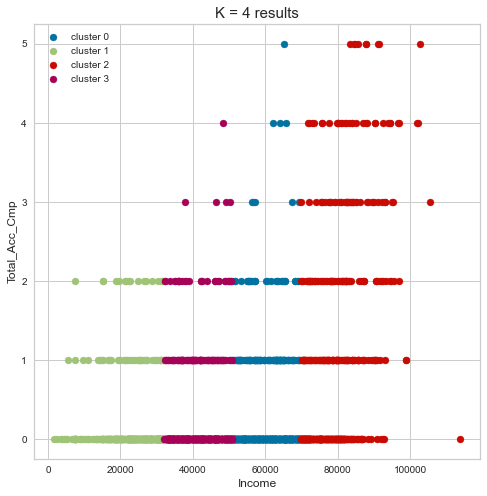

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(0,4):
    plt.scatter(eda_df.loc[eda_df['cluster'] == i, 'Income'], eda_df.loc[eda_df['cluster'] == i, 'Total_Acc_Cmp'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Income', size = 12)
plt.ylabel('Total_Acc_Cmp', size = 12)
plt.show()

#### 4. Income ~ Age

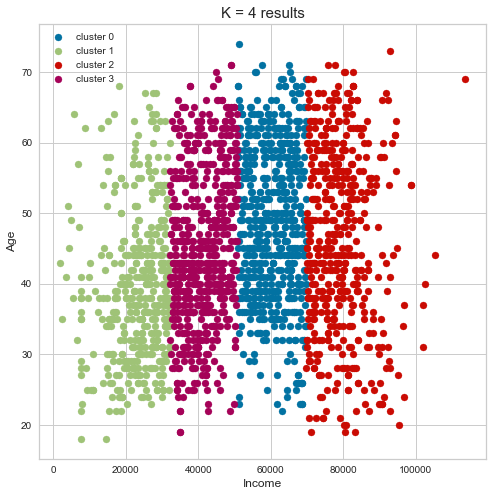

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(0,4):
    plt.scatter(eda_df.loc[eda_df['cluster'] == i, 'Income'], eda_df.loc[eda_df['cluster'] == i, 'Age'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Income', size = 12)
plt.ylabel('Age', size = 12)
plt.show()

#### 5. TotalMntSpent ~ Children

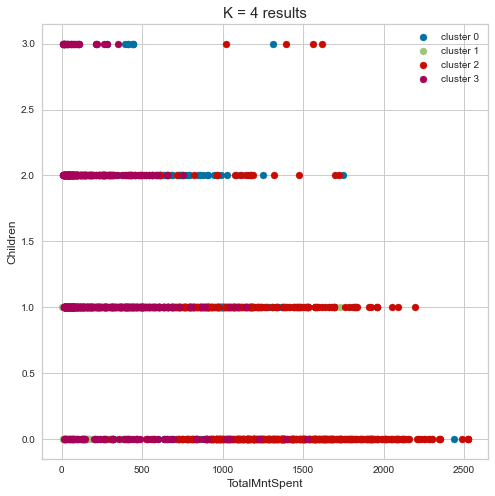

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(0,4):
    plt.scatter(eda_df.loc[eda_df['cluster'] == i, 'TotalMntSpent'], eda_df.loc[eda_df['cluster'] == i, 'Children'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('TotalMntSpent', size = 12)
plt.ylabel('Children', size = 12)
plt.show()

### 2-3. 다차원 시각화

In [70]:
import plotly.express as px

In [73]:
fig = px.scatter_3d(eda_df, x = 'Income', y = 'TotalMntSpent', z = 'TotalNumPurchases', color = 'cluster')
fig.show()

- cluster2 : 고소득층 (Income이 높고, TotalMntSpent이 많고, TotalNumPurchases가 많음)
- cluster0 : 중소득층 (Income이 중간, TotalMntSpent이 중간, TotalNumPurchases가 중간)
- cluster3 : 중소득층 (Income이 중간, TotalMntSpent이 중간, TotalNumPurchases가 중간)
- cluster1 : 저소득층 (Income이 낮고, TotalMntSpent이 적고, TotalNumPurchases가 적음)